In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.3 MB/s eta 0:00:00


In [1]:
import keras_tuner as kt
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

#Carregar dados (CIFAR10)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
print(x_train.shape)
print(type(x_train))

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


#Analisar e visualizar dados

**************************************************
Training set shape: (50000, 32, 32, 3) and testing set shape: (10000, 32, 32, 3)
Training labels set shape: (50000, 1) and testing labels set shape: (10000, 1)
There are 50000 elems in the training set and 10000 in the test set
**************************************************


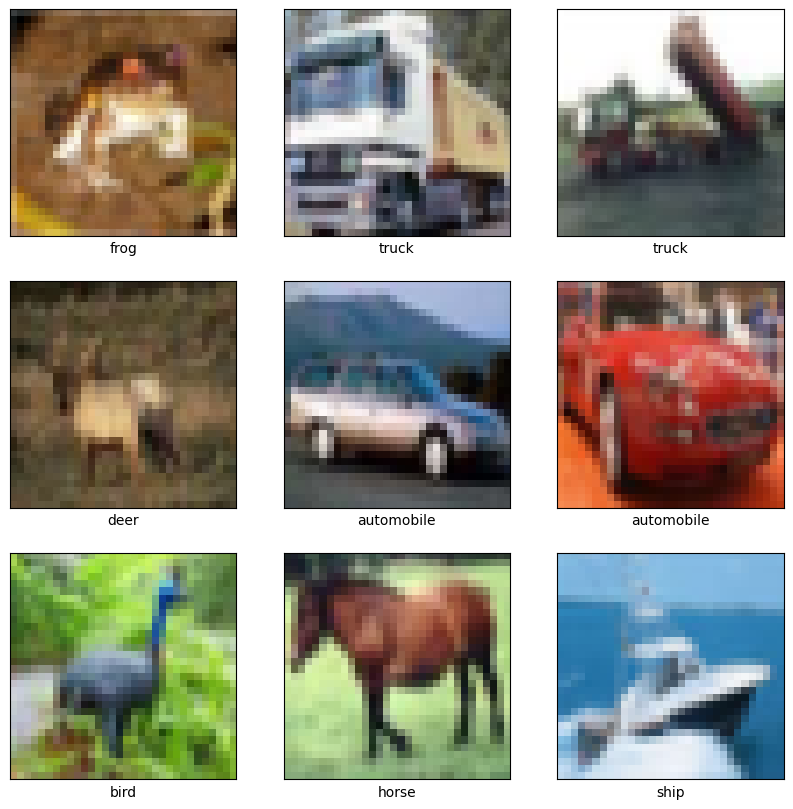

In [ ]:
print(50*'*')
print("Training set shape:", x_train.shape, "and testing set shape:", x_test.shape)
print("Training labels set shape:", y_train.shape, "and testing labels set shape:", y_test.shape)
print("There are", len(x_train), "elems in the training set and", len(x_test), "in the test set")
# print("Example of training sample 8: ", x_train[7])
# print("Example of training sample 8 label: ", classes[y_train[7]])
print(50*'*')

plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(tf.squeeze(x_train[i]))
  plt.xlabel(classes[y_train[i][0]])
plt.show()

Text(0.5, 1.0, 'Class distribution in training set')

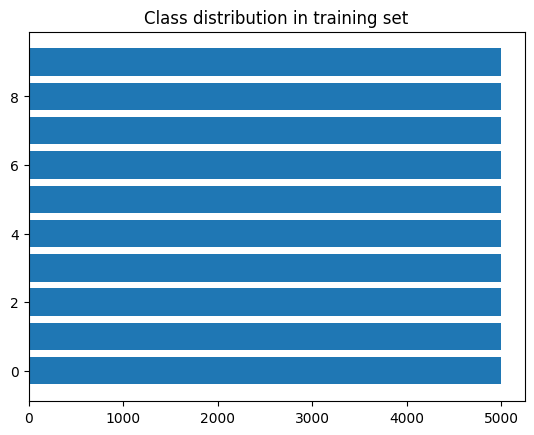

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes, counts)
plt.title('Class distribution in training set')

#Normalizar dados

In [3]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

#CNN (com data augmentation)

In [8]:
model = tf.keras.Sequential()
#data augmentation
model.add(tf.keras.layers.RandomFlip('horizontal', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.RandomRotation(0.05))
model.add(tf.keras.layers.RandomZoom(0.05))
#microarchitecture
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
#microarchitecture
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
#bottleneck
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#printing a summary of the model structure
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,482 (2.08 MB)

 Trainable params: 545,290 (2.08 MB)

 Non-trainable params: 192 (768.00 B)

#CNN (sem data augmentation)

In [6]:
def build_model(hp):
  model = tf.keras.Sequential()
  #microarchitecture
  model.add(tf.keras.layers.Conv2D(filters=hp.Int('filter_1',min_value=16,max_value=256,step=16),kernel_size=hp.Choice('kernel_size_1',values=[3,5]),activation='relu',input_shape=(32,32,3)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=hp.Choice('pool_2',values=[2,4,6])))
  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Conv2D(filters=hp.Int('filter_2',min_value=16,max_value=256,step=16),kernel_size=hp.Choice('kernel_size_2',values=[3,5]),activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=hp.Choice('pool_2',values=[2,4,6])))
  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=hp.Int('Unit_1',min_value=16,max_value=256,step=16),activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.summary()

  lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

#MLP

In [ ]:
def build_model(hp):
  model = tf.keras.Sequential()
  #microarchitecture
  model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

  model.add(tf.keras.layers.Dense(units=hp.Int('Unit_1',min_value=16,max_value=256,step=16),activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp.Int('Unit_2',min_value=16,max_value=32,step=16),activation='relu'))
  model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

  lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  optimizer_name = hp.Choice('optimizer', ['adam', 'sgd'])
  if optimizer_name == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  elif optimizer_name == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  model.summary()
  return model

#Random Search

In [7]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    # directory='/content/cifar10_MLP_benchmark',
    directory='/content/cifar10_CNN_sda_benchmark',
    project_name='cifar10_CNN_sda_benchmark'
)

batch_size = 32
tuner.search(
    x_train, y_train,
    epochs=25,
    validation_split=0.2,
    batch_size=batch_size,
    callbacks=[early_stop]
)

Trial 10 Complete [00h 00m 01s]

Best val_accuracy So Far: 0.7454000115394592
Total elapsed time: 00h 07m 48s


#Obter melhores hiperparametros e modelos

In [9]:
melhores_modelos = tuner.get_best_models(num_models=1)[0]
# melhores_modelos.summary()
melhores_hiperparametros = tuner.get_best_hyperparameters(num_trials=1)[0]
melhores_hiperparametros.get_config()['values']

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 240)    │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 240)    │           960 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 240)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 240)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 256)    │       553,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 160)            │     1,474,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,038,250 (7.78 MB)

 Trainable params: 2,037,258 (7.77 MB)

 Non-trainable params: 992 (3.88 KB)

{'filter_1': 240,
 'kernel_size_1': 3,
 'pool_2': 2,
 'filter_2': 256,
 'kernel_size_2': 3,
 'Unit_1': 160,
 'learning_rate': 0.0001}

#Treinar modelo tendo em conta random search

In [10]:
melhor_model = tuner.hypermodel.build(melhores_hiperparametros)
history = melhor_model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 240)    │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 240)    │           960 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 240)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 240)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 256)    │       553,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 160)            │     1,474,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,038,250 (7.78 MB)

 Trainable params: 2,037,258 (7.77 MB)

 Non-trainable params: 992 (3.88 KB)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3503 - loss: 1.9283 - val_accuracy: 0.5560 - val_loss: 1.2551
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5428 - loss: 1.2810 - val_accuracy: 0.6108 - val_loss: 1.1546
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6146 - loss: 1.0757 - val_accuracy: 0.6574 - val_loss: 0.9849
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6683 - loss: 0.9350 - val_accuracy: 0.6311 - val_loss: 1.1275
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7139 - loss: 0.8147 - val_accuracy: 0.6856 - val_loss: 0.9490
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7455 - loss: 0.7172 - val_accuracy: 0.7123 - val_loss: 0.8341
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7777 - loss: 0.6255 - val_accuracy: 0.7127 - val_loss: 0.8379
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8053 - loss: 0.5564 -

#Avaliar modelo

313/313 - 1s - 2ms/step - accuracy: 0.7251 - loss: 0.9942


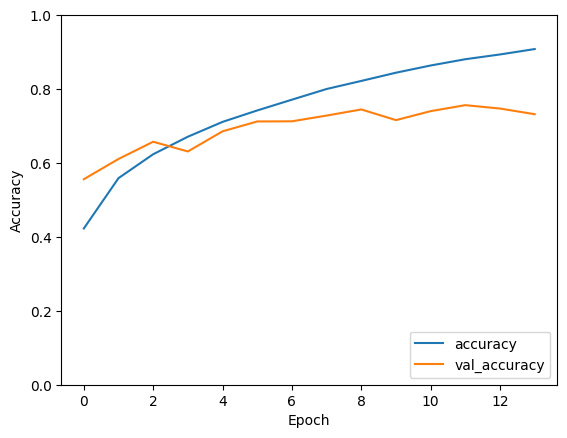

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = melhor_model.evaluate(x_test,  y_test, verbose=2)

<Axes: >

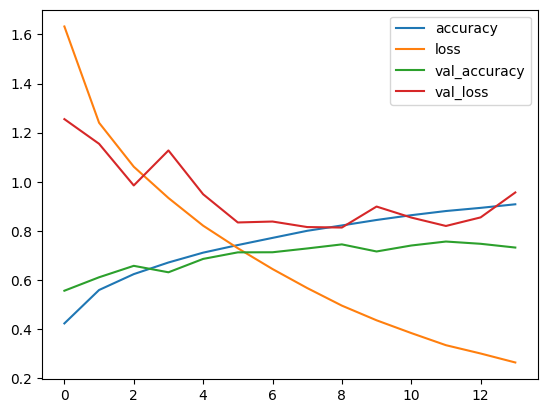

In [19]:
import pandas as pd
pd.DataFrame(history.history).plot()

#Classification Report

In [12]:
pred = melhor_model.predict(x_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1000
           1       0.89      0.78      0.83      1000
           2       0.69      0.59      0.64      1000
           3       0.51      0.58      0.54      1000
           4       0.71      0.67      0.69      1000
           5       0.66      0.61      0.63      1000
           6       0.61      0.92      0.74      1000
           7       0.85      0.75      0.79      1000
           8       0.83      0.83      0.83      1000
           9       0.81      0.82      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



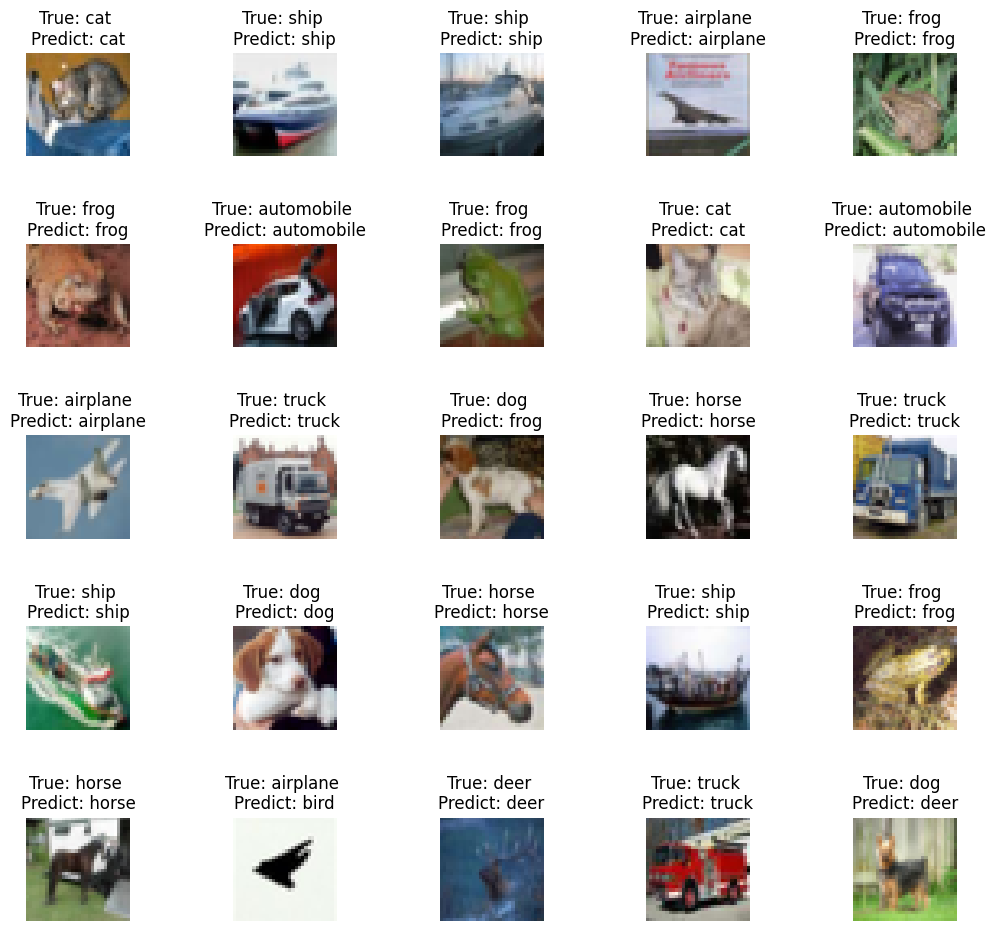

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(25):
    axes[i].imshow(x_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (classes[y_true[i]], classes[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

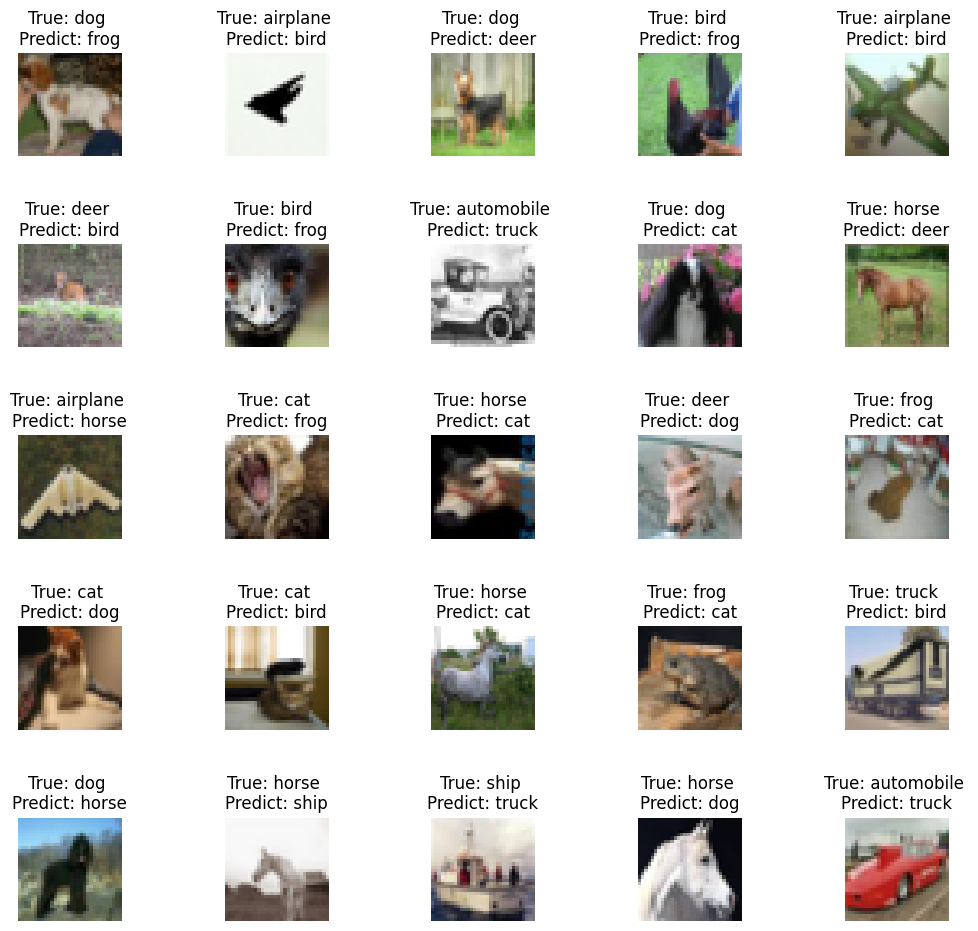

In [16]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

miss_pred = np.where(y_pred != y_true)[0]
for i in np.arange(25):
    axes[i].imshow(x_test[miss_pred[i]])
    axes[i].set_title('True: %s \nPredict: %s' % (classes[y_true[miss_pred[i]]], classes[y_pred[miss_pred[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

#Guardar o modelo

In [17]:
melhor_model.save('cifar10_CNN_sda.keras')